# Ch9-Part01

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

* MNIST Dataset

In [2]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


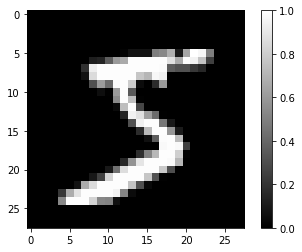

5


In [5]:
# 9.2 MNIST 데이터세트 확인
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [4]:
# 9.3 Dense 오토인코더 모델 정의
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 9.4 Dense 오토인코더 모델 학습
model.fit(train_X, train_X, epochs=10, batch_size=256)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0512
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0173
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0119
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0098
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0086
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0078
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0073
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0069
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0066
Epoch 10/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0063


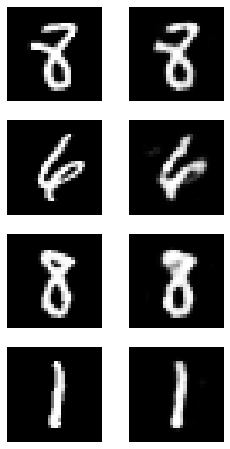

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00608166594132781

In [7]:
# 9.5 test 데이터로 Dense 오토인코더의 이미지 재생성
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

In [8]:
# 9.6 컨볼루션 오토인코더 모델 정의
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)       

In [9]:
# 9.7 컨볼루션 오토인코더 모델 학습
model.fit(train_X, train_X, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0753
Epoch 2/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0332
Epoch 3/20
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0261
Epoch 4/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0240
Epoch 5/20
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0229
Epoch 6/20
60000/60000 [==============================] - 18s 304us/sample - loss: 0.0223
Epoch 7/20
60000/60000 [==============================] - 19s 310us/sample - loss: 0.0219
Epoch 8/20
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0216
Epoch 9/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0214
Epoch 10/20
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0212 - lo
Epoch 11/20
60000/60000 [==============================] - 18s 300us/sa

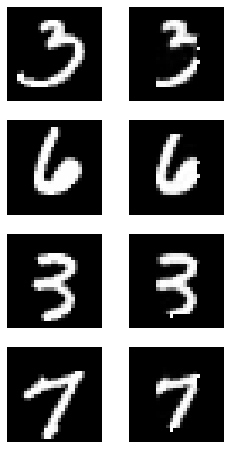

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.019836190086603166

In [10]:
# 9.8 test 데이터로 컨볼루션 오토인코더의 이미지 재생성
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

* 참고)

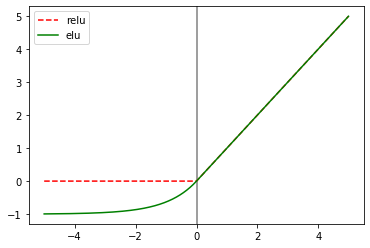

In [11]:
# 그림 9.7 출력 코드
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

# plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [12]:
# 9.9 활성화함수를 elu로 바꾼 컨볼루션 오토인코더 모델 정의 및 학습
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

model.fit(train_X, train_X, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 383us/sample - loss: 0.0587
Epoch 2/20
60000/60000 [==============================] - 22s 373us/sample - loss: 0.0171
Epoch 3/20
60000/60000 [==============================] - 22s 362us/sample - loss: 0.0111
Epoch 4/20
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0096
Epoch 5/20
60000/60000 [==============================] - 22s 365us/sample - loss: 0.0088 - loss: 0 - ET
Epoch 6/20
60000/60000 [==============================] - 22s 371us/sample - loss: 0.0084
Epoch 7/20
60000/60000 [==============================] - 21s 357us/sample - loss: 0.0080
Epoch 8/20
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0078
Epoch 9/20
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0076
Epoch 10/20
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0074
Epoch 11/20
60000/60000 [==============================] - 23

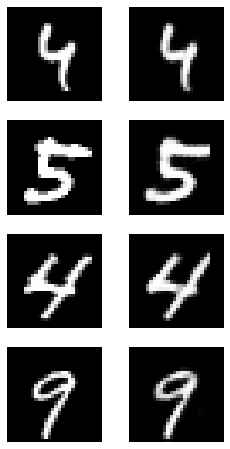

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006197522433102131

In [13]:
# 9.10 test 데이터로 컨볼루션 오토인코더의 이미지 재생성
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

# 초해상도(Super Resolution) 이미지 얻기

In [ ]:
tf.keras.utils.get_file('/content/bsd_images.zip', 'http://bit.ly/35pHZlC', extract=True)

!unzip /content/bsd_images.zip

In [ ]:
# 9.19 이미지 경로 저장 및 확인
import pathlib
image_root = pathlib.Path('/content/images')

all_image_paths = list(image_root.glob('*/*'))
print(all_image_paths[:10])

In [ ]:
# 9.20 이미지 확인
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for c in range(9):
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(all_image_paths[c]))
    plt.title(all_image_paths[c])
    plt.axis('off')
plt.show()

In [ ]:
# 9.21 이미지 경로 분리 저장
train_path, valid_path, test_path = [], [], []

for image_path in all_image_paths:
    if str(image_path).split('.')[-1] != 'jpg':
        continue
    
    if str(image_path).split('/')[-2] == 'train':
        train_path.append(str(image_path))
    elif str(image_path).split('/')[-2] == 'val':
        valid_path.append(str(image_path))
    else:
        test_path.append(str(image_path))

In [ ]:
# 9.22 원본 이미지에서 조각을 추출하고 입력, 출력 데이터를 반환하는 함수 정의
def get_hr_and_lr(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    hr = tf.image.random_crop(img, [50, 50, 3])
    lr = tf.image.resize(hr, [25, 25])
    lr = tf.image.resize(lr, [50, 50])
    return lr, hr

In [ ]:
# 9.23 train, valid Dataset 정의
train_dataset = tf.data.Dataset.list_files(train_path)
train_dataset = train_dataset.map(get_hr_and_lr)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

valid_dataset = tf.data.Dataset.list_files(valid_path)
valid_dataset = valid_dataset.map(get_hr_and_lr)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(1)

In [ ]:
# 9.24 tf.keras의 함수형 API를 사용한 REDNet 네트워크 정의
def REDNet(num_layers):
    conv_layers = []
    deconv_layers = []
    residual_layers = []

    inputs = tf.keras.layers.Input(shape=(None, None, 3))
    conv_layers.append(tf.keras.layers.Conv2D(3, kernel_size=3, padding='same', activation='relu'))

    for i in range(num_layers-1):
        conv_layers.append(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
        deconv_layers.append(tf.keras.layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu'))

    deconv_layers.append(tf.keras.layers.Conv2DTranspose(3, kernel_size=3, padding='same'))

    # 인코더 시작
    x = conv_layers[0](inputs)

    for i in range(num_layers-1):
        x = conv_layers[i+1](x)
        if i % 2 == 0:
            residual_layers.append(x)

    # 디코더 시작
    for i in range(num_layers-1):
        if i % 2 == 1:
            x = tf.keras.layers.Add()([x, residual_layers.pop()])
            x = tf.keras.layers.Activation('relu')(x)
        x = deconv_layers[i](x) 

    x = deconv_layers[-1](x)
    
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [ ]:
# 9.25 PSNR 정의
def psnr_metric(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

In [ ]:
# 9.26 REDNet-30 네트워크 초기화 및 컴파일
model = REDNet(15)
model.compile(optimizer=tf.optimizers.Adam(0.0001), loss='mse', metrics=[psnr_metric])
# 네트워크 시각화
# tf.keras.utils.plot_model(model)

In [ ]:
# 9.27 REDNet-30 네트워크 학습
history = model.fit_generator(train_dataset, 
                              epochs=1000, 
                              steps_per_epoch=len(train_path)//16, 
                              validation_data=valid_dataset, 
                              validation_steps=len(valid_path), 
                              verbose=2)

In [ ]:
# 9.28 REDNet-30 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['psnr_metric'], 'b-', label='psnr')
plt.plot(history.history['val_psnr_metric'], 'r--', label='val_psnr')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 9.29 test 이미지 super resolution
img = tf.io.read_file(test_path[0])
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//2, hr.shape[1]//2])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))

In [ ]:
# 9.30 test 이미지 super resolution 결과 확인
plt.figure(figsize=(8,16))

plt.subplot(3, 1, 1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(3, 1, 2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(3, 1, 3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')

In [ ]:
# 9.31 Set5의 나비 이미지 테스트
image_path = tf.keras.utils.get_file('butterfly.png', 'http://bit.ly/2oAOxgH')
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//2, hr.shape[1]//2])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))


plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(1, 3, 2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')

In [ ]:
# 9.32 확대 비율을 2배에서 4배로 수정, 이미지 보강
import random
def get_hr_and_lr_flip_s4(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    hr = tf.image.random_crop(img, [50, 50, 3])
    lr = tf.image.resize(hr, [12, 12])
    lr = tf.image.resize(lr, [50, 50])
    
    if random.random() < 0.25:
        hr = tf.image.flip_left_right(hr)
        lr = tf.image.flip_left_right(lr)
    if random.random() < 0.25:
        hr = tf.image.flip_up_down(hr)
        lr = tf.image.flip_up_down(lr)
    
    return lr, hr

In [ ]:
# 9.33 REDNet-30 네트워크 학습
train_dataset = tf.data.Dataset.list_files(train_path)
train_dataset = train_dataset.map(get_hr_and_lr_flip_s4)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

valid_dataset = tf.data.Dataset.list_files(valid_path)
valid_dataset = valid_dataset.map(get_hr_and_lr_flip_s4)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(1)

model = REDNet(15)
model.compile(optimizer=tf.optimizers.Adam(0.0001), loss='mse', metrics=[psnr_metric])

history = model.fit_generator(train_dataset, 
                              epochs=4000, 
                              steps_per_epoch=len(train_path)//16, 
                              validation_data=valid_dataset, 
                              validation_steps=len(valid_path), 
                              verbose=2)

In [ ]:
# REDNet-30 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['psnr_metric'], 'b-', label='psnr')
plt.plot(history.history['val_psnr_metric'], 'r--', label='val_psnr')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Set5의 나비 이미지 테스트
image_path = tf.keras.utils.get_file('butterfly.png', 'http://bit.ly/2oAOxgH')
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//4, hr.shape[1]//4])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))


plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(1, 3, 2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')